# <center>SEABORN TUTORIAL</center>

* **_Bibliografias_**:
    * https://www.youtube.com/watch?v=6GUZXDef2U0

## SETUP

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# padronizando a exibição na própria célula e não em tela diferente
#%matplotlib inline

# faz o reload das importações quando houver reload de células
#%reload_ext autoreload
#%autoreload 2

## DATASETS

Usaremos datasets do próprio seaborn para o tutorial.

In [2]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [3]:
df_flights = sns.load_dataset('flights')
#df_flights

In [4]:
df_crash = sns.load_dataset('car_crashes')
#df_crash

In [5]:
df_tips = sns.load_dataset('tips')
#df_tips

In [6]:
df_iris = sns.load_dataset('iris')
# df_iris

# <center> DISTRIBUTION PLOTS </center>

## DISTRIBUTION PLOT

* Podemos desativar a linha da densidade da distribuição: kde=False. É interessante observar que o desligamento da densidade da distribuição irá fazer com que o gráfico apresente números absolutos no eixo coordenado.

* Podemos criar intervalos: bins=[2,4,6,8,20] ou bins=25

/tmp/ipykernel_26674/1194827181.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_crash['not_distracted'], kde=False, bins=10)


<Axes: xlabel='not_distracted'>

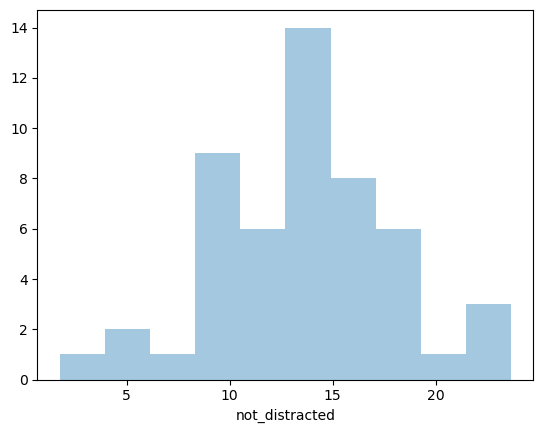

In [7]:
sns.distplot(df_crash['not_distracted'], kde=False, bins=10)

## JOIN PLOT

* É usado para comparar duas distribuições. É interessante notar que os dois conjuntos de dados normalmente fazem parte do mesmo dataframe (data=).
* A primeira distribuição vai no eixo da abscissa (x='').
* A segunda distribuição vai no eixo coordenado (y='').
* A forma de exibição pode variar entre 'reg' (regressão), 'kde' (kernel density estimate) ou 'hex' (distribuição em hexagonos).

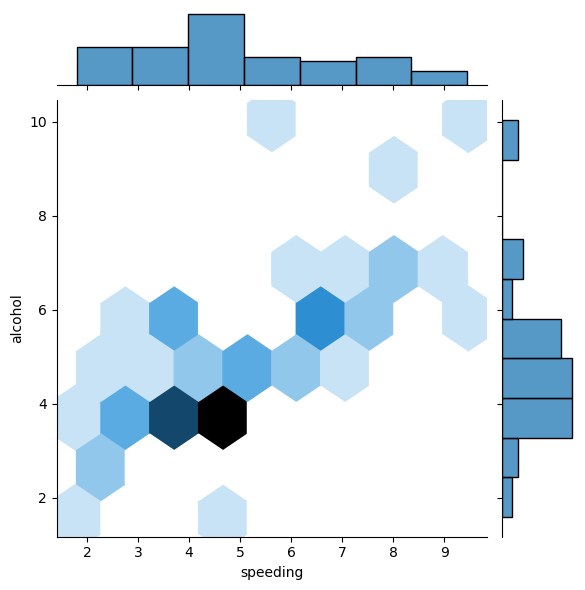

In [8]:
sns.jointplot(x='speeding', y='alcohol', data=df_crash, kind='hex')

## KDE PLOT

* Foca exatamente nos núcleos de densidade.

<Axes: xlabel='alcohol', ylabel='Density'>

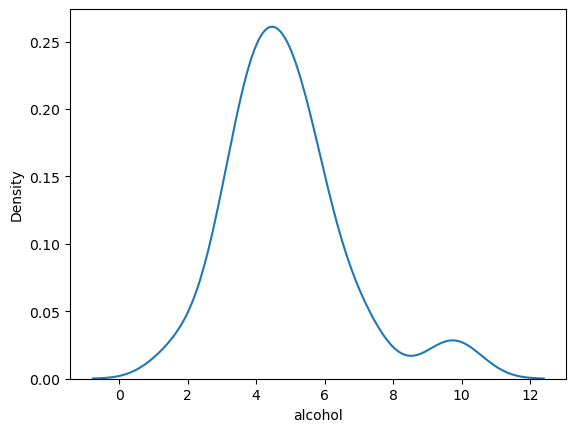

In [9]:
sns.kdeplot(df_crash['alcohol'])

## PAIR PLOTS

* Faz uma montagem de gráficos de todos os pares de atributos de uma relação.
* O parâmetro "hue=" deve ser usado em conjunto com o "palette=", uma vez que são usados quando queremos colorir dados categóricos. A ideia é fazer um agrupamento dos valores do atributo selecionado, sendo certo que esses valores serão coloridos e exibidos com tonalidades de acordo com a respectiva correspondência. Por exemplo, agrupar os dados de acordo com 'sexo' vai resultar em dois valores: (masculino, azul claro) e (feminino, azul escuro).
* Quando os valores são inteiros, o gráficos são plotados em uma mesma linha. Porém, quando os valores são reais, ficam melhor distribuídos.

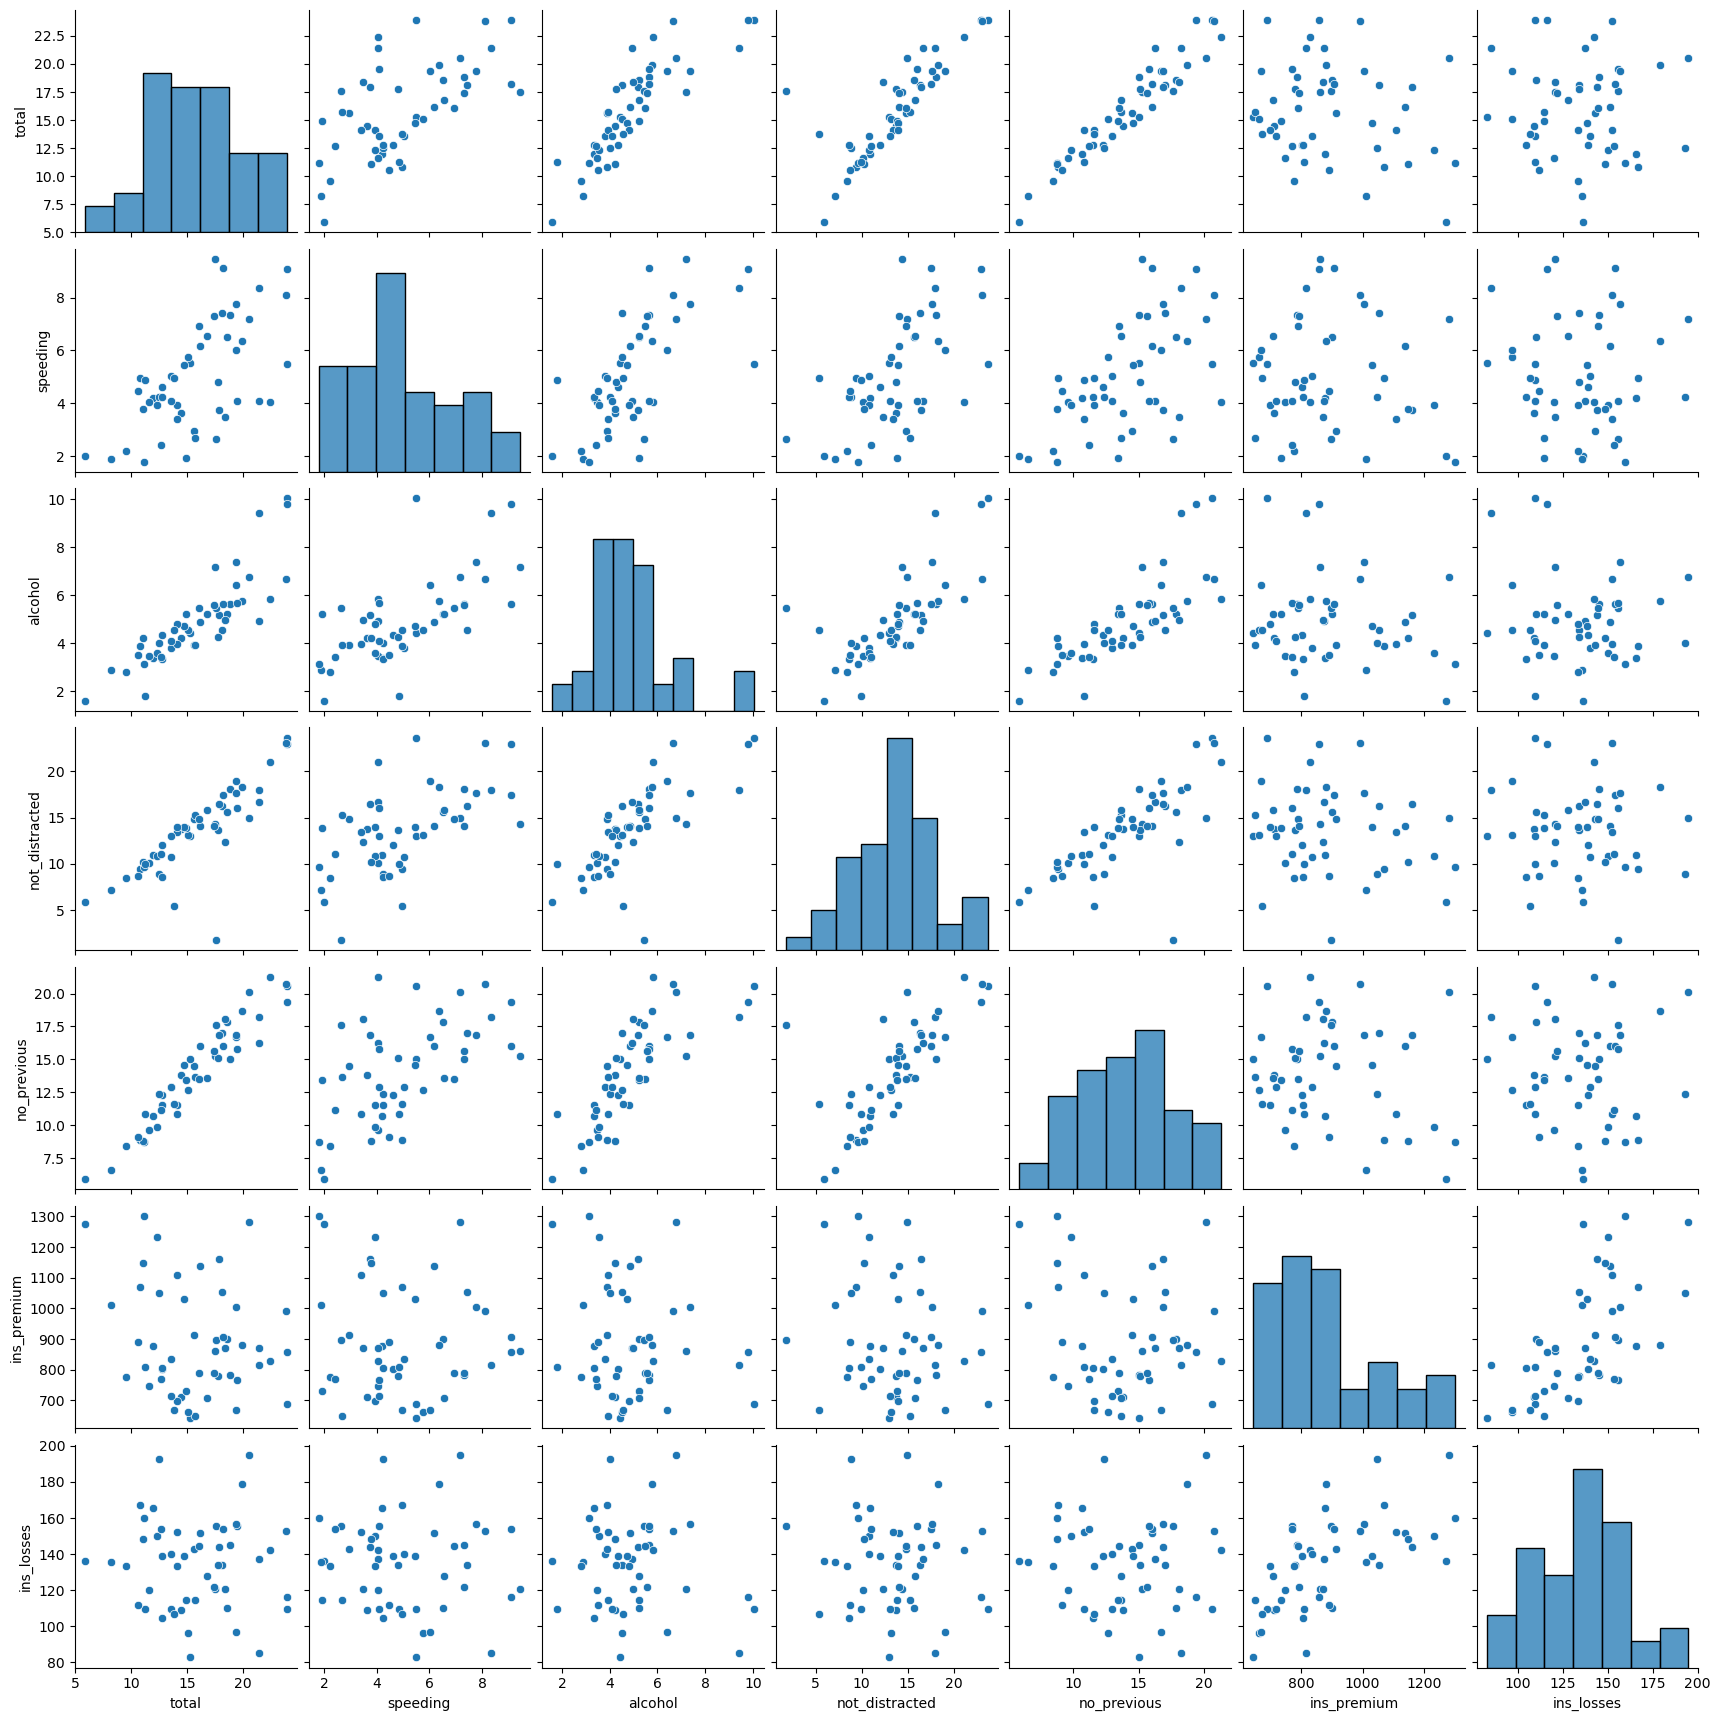

In [10]:
sns.pairplot(df_crash)

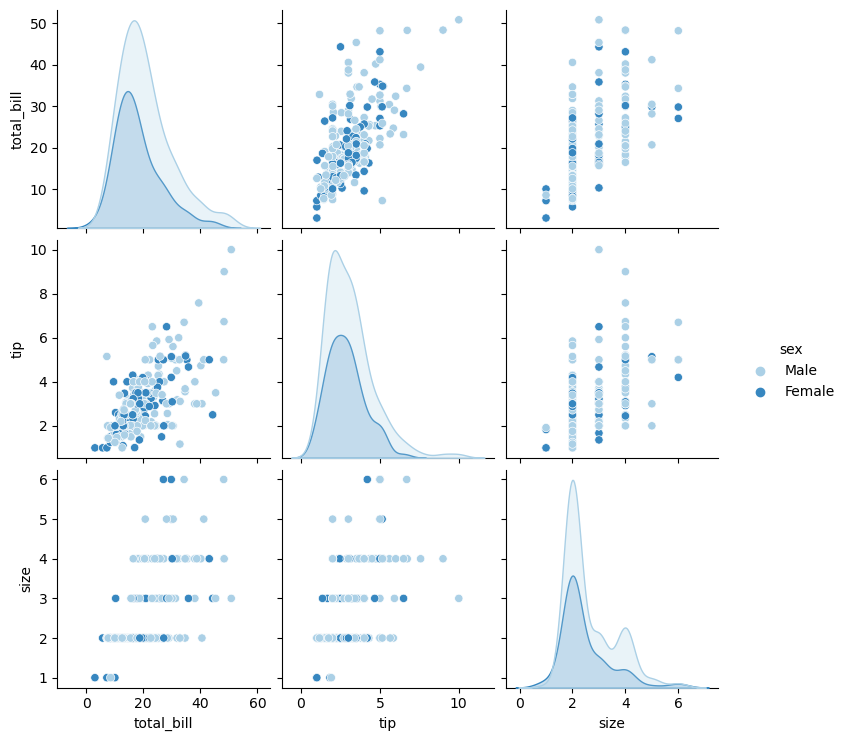

In [11]:
sns.pairplot(df_tips, hue='sex', palette='Blues')

## STYLING

* É possível estilizar o gráfico (set_style).
    
    * _set style_: recebe um único parâmetro e altera o pano de fundo do gráfico. Podemos usar os seguintes valores: 'darkgrid', 'whitegrid', 'dark', 'white', 'ticks'.

* É possível alterar o tamanho da imagem.
    
    * _figure_: altera características da imagem produzida. O parâmetro 'figsize=(width, height)' determina a largura e a altura (em pixels) da imagem.

* É possível alterar o contexto. Isto irá modificar o tamanho e a aparência dos eixos e das plotagens, de modo que o gráfico fique otimizado para ser usado em diferentes contextos.
    
    * _set context_: altera as informações de estilo do contexto. Podemos passar as seguintes variáveis: 'paper', 'talk', 'poster'

    * _font scale_: altera o tamanho da fonte utilizada. Os valores das fontes são em valores relativos. Por exemplo: 1.4.

* As linhas de demarcação dos eixos podem ser ativadas ou desativadas utilizando o método despine, mas isso preserva os valores de escalas. **O método precisa ser colocado depois da função para poder funcionar.**

    * _despine_: pode receber vários parâmetros, mas todos booleanos: left=, bottom=, right=, top=. É interessante notar que o valor True retira o eixo.

    

<Figure size 800x400 with 0 Axes>

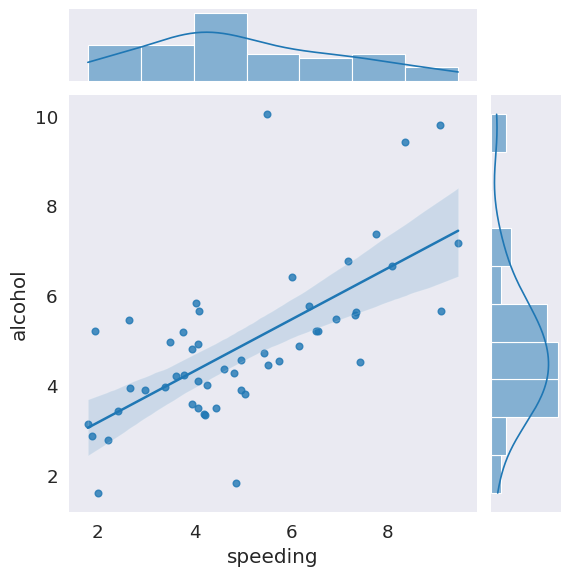

In [12]:
sns.set_style('dark')

plt.figure(figsize=(8,4))

sns.set_context('paper', font_scale=1.5)

sns.jointplot(x='speeding', y='alcohol', data=df_crash, kind='reg')

sns.despine(left=True,right=True, bottom=True)

# <center>CATEGORICAL PLOTS</center>

Normalmente usamos os gráficos abaixo para dados categóricos.

## BAR PLOT

Esse gráfico apresenta a distribuição em valores absolutos dos dados categóricos. Nesse contexto, em primeiro lugar, é interessante notar que no topo das barras existe um traço, que simboliza a variância dos dados. Em segundo lugar, é interessante notar que, por padrão, existe a ideia de que o gráfico será montado a partir do agrupamento do domínio do atributo passado em X para correlacionar o agrupamento ao valor médio indicado em Y.

* Nós podemos alterar valores default. 
    * _estimator_: por default, usa-se o valor 'mean' (média). Mas, podemos alterar para a mediana (usando 'median' ou np.median), ou desvio-padrão (usando np.std), ou variância (np.var), ou covariância (np.cov).

<Axes: xlabel='sex', ylabel='total_bill'>

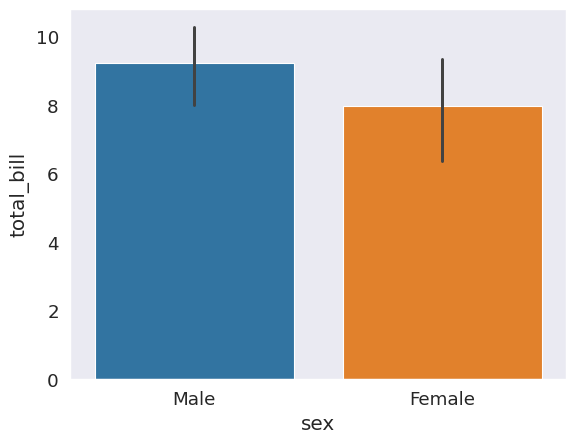

In [13]:
sns.barplot(x='sex', y='total_bill', data=df_tips, estimator=np.std)

## COUNT PLOTS

É bastante parecido com o barplot, porém o estimador do count plot será sempre o total. Por essa razão, não precisamos indicar o valor de Y, uma vez que fica subentendido.

<Axes: xlabel='sex', ylabel='count'>

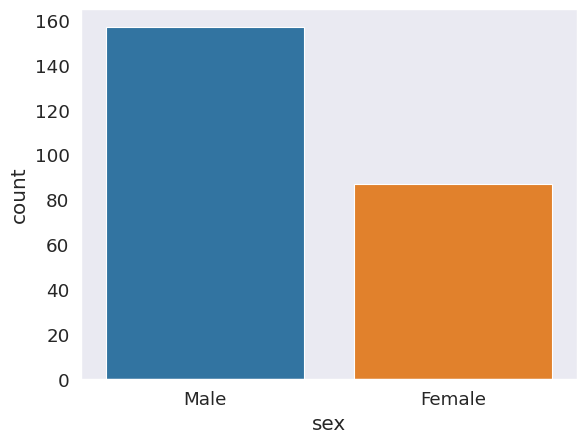

In [14]:
sns.countplot(x='sex', data=df_tips)

## BOXPLOT

Permite que possamos fazer a comparação de várias variáveis. Por exemplo, podemos estudar o total das contas (consumo) por dia (quinta, sexta, sábado e domingo). Essa representação seria o cruzamento de duas dimensões (total de contas, dia da semana). Mas, podemos escalar o conhecimento comparando o total das contas através de uma terceira variável que seria o sexo (masculino ou feminino). Isso nos permitiria ver que os homens gastam mais que as mulheres apresentam uma maior taxa de consumo no final de semana, enquanto que os homens consomem mais nas quintas e sextas.

* É possível alterar a posição da legenda inserindo o plt.legend() depois da função de plotagem. Por meio do parâmetro loc=, podemos indicar a posição da legenda nos cantos.



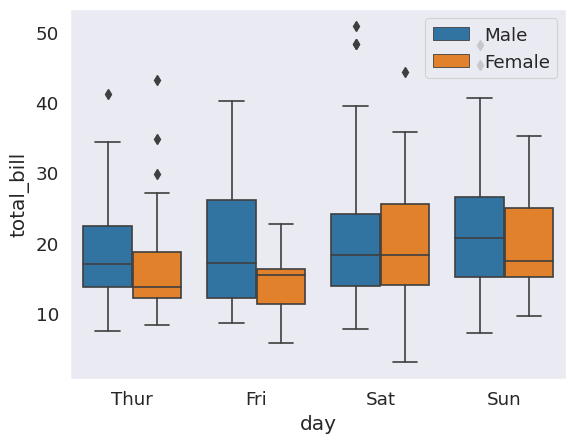

In [15]:
sns.boxplot(x='day', y='total_bill', data=df_tips, hue='sex')

plt.legend(loc=1)

## VIOLIN PLOT

É similar ao boxplot. Porém, aproxima-se muito de uma combinação entre o Boxplot e o KDE Plot. Por exemplo, podemos melhorar a análise a partir da divisão de dados com o parâmetro split.

<Axes: xlabel='day', ylabel='total_bill'>

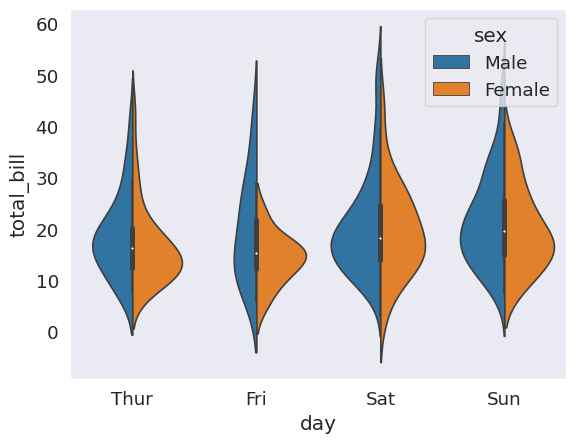

In [16]:
sns.violinplot(x='day', y='total_bill', data=df_tips, hue='sex', split=True)

## STRIP PLOT

Trata-se de um gráfico para mostrar distribuições de valores. No gráfico abaixo, por exemplo, são plotados todos os valores de contas por dia de consumo.

* É possível separar um pouco os pontos plotados utilizando o parâmetro booleano jitter.
* É possível dividir os dados de forma mais interessante com o hue.
* É possível ainda separar os valores de hue em distribuições diferentes com o parâmetro dodge.

<Axes: xlabel='day', ylabel='total_bill'>

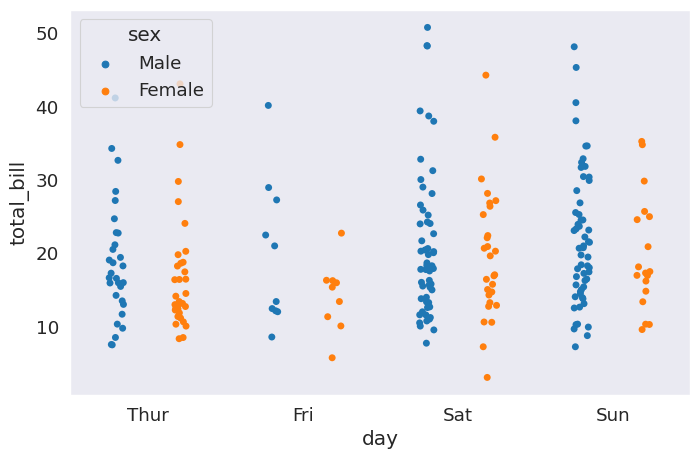

In [17]:
plt.figure(figsize=(8,5))

sns.stripplot(x='day', y='total_bill', data=df_tips, jitter=True, hue='sex', dodge=True)

## SWARM PLOT

Trata-se de um gráfico que mistura a ideia do violinplot e do strip plot. Isto é, apresenta os dados da distribuição de acordo com sus densidade, mas na forma de pontos. É possível fazer a plotagem do swarmplot isoladamente, mas, embora o resultado seja interessante, ele fica ainda melhor se combinarmos o violinplot com ele. Afinal, podemos mostrar como os dados estão distribuidos.

<Axes: xlabel='day', ylabel='total_bill'>

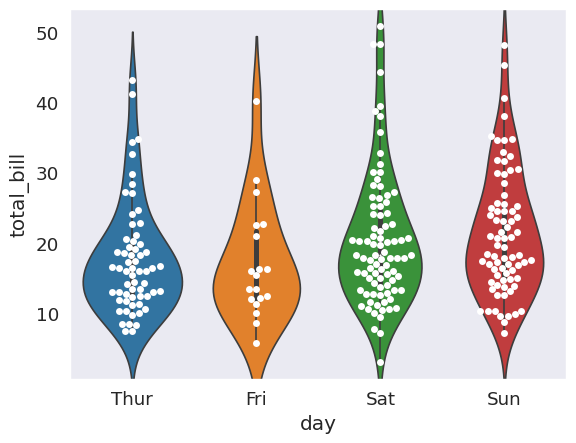

In [18]:
sns.violinplot(x='day', y='total_bill', data=df_tips)
sns.swarmplot(x='day', y='total_bill', data=df_tips, color='white')

# <center>MATRIX PLOTS</center>

## HEATMAPS

Podemos fazer o cruzamento dos atributos de uma matriz para verificar se existe algum padrão. Isso pode ser feito quando buscamos uma correlação entre dois atributos selecionados ou quando utilizamos dois conjuntos de valores dos próprios atributos. 

* É possível deixar o heatmap mais informativo, utilizando os valores numéricos no centro de cada célula de cruzamento. Para fazer isso, é preciso usar o parâmetro 'annot=True'.

* É possível colorir as células de acordo com o valor do cruzamento dos dados (valor anotado), utilizando o colormaps ('cmap=').

* É possível separar as células utilizando linhas de separação. Nesse caso, é conveniente e necessário indicar a largura da linha (linewidth=) e a cor da linha (linecolor=).

### CORRELACIONANDO ATRIBUTOS

* É necessário utilizar uma função do tipo CORR() para correlacionar os dados.

In [19]:
crash_corr = df_crash.corr()
crash_corr

/tmp/ipykernel_26674/4036124268.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  crash_corr = df_crash.corr()


,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
total,1.000000,0.611548,0.852613,0.827560,0.956179,-0.199702,-0.036011
speeding,0.611548,1.000000,0.669719,0.588010,0.571976,-0.077675,-0.065928
alcohol,0.852613,0.669719,1.000000,0.732816,0.783520,-0.170612,-0.112547
not_distracted,0.827560,0.588010,0.732816,1.000000,0.747307,-0.174856,-0.075970
no_previous,0.956179,0.571976,0.783520,0.747307,1.000000,-0.156895,-0.006359
ins_premium,-0.199702,-0.077675,-0.170612,-0.174856,-0.156895,1.000000,0.623116
ins_losses,-0.036011,-0.065928,-0.112547,-0.075970,-0.006359,0.623116,1.000000


<Axes: >

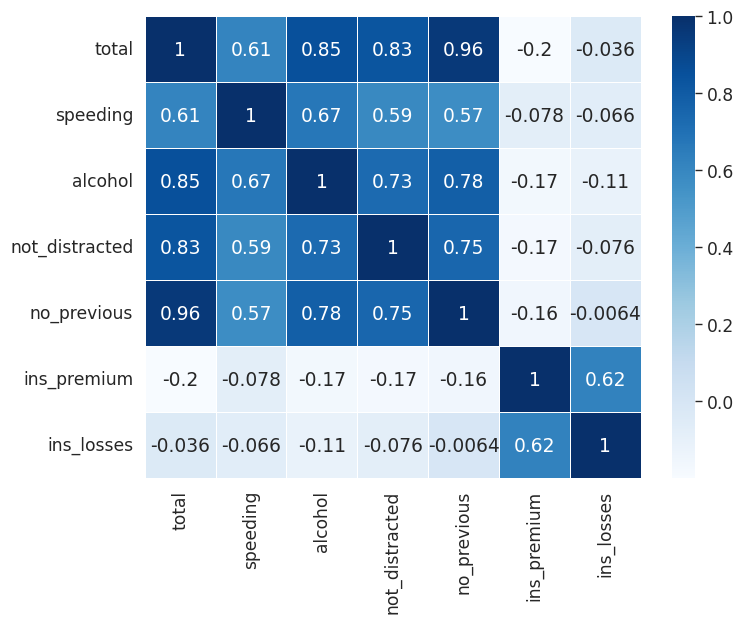

In [20]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)
sns.heatmap(crash_corr, annot=True, cmap='Blues', linecolor='white', linewidths=0.5)


### CORRELACIONANDO VALORES DOS ATRIBUTOS

Nesse caso, é necessário utilizar a função de pivoteamento de tabela.

In [21]:
pivot_table_flights = df_flights.pivot_table(index='month', columns='year', values='passengers')
pivot_table_flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<Axes: xlabel='year', ylabel='month'>

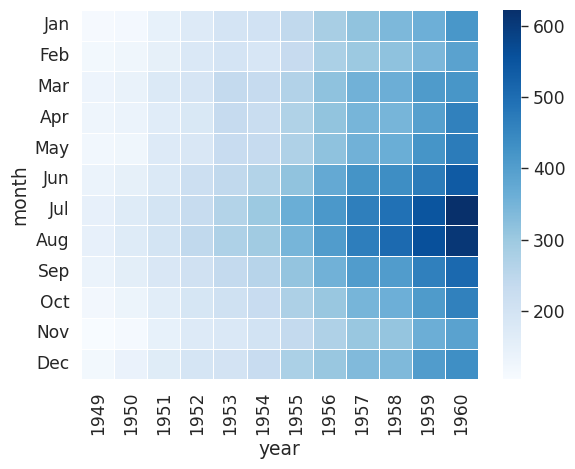

In [22]:
sns.heatmap(pivot_table_flights, cmap='Blues', linecolor='white', linewidths=0.5)

## CLUSTERMAP

A clusterização é o método utilizado para encontrar padrões em determinado conjunto de dados, de acordo com um determinado atributo alvo. Em Machine Learning, o método é encapsulado em funções que variam de acordo com o método usado, por exemplo: K-Means (distância média em relação aos vizinhos), DBScan (densidade dos dados), etc.

In [23]:
df_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [24]:
# Isola o atributo alvo
species = df_iris.pop('species')

O mapa abaixo é chamado de Heatmap Hierarquicamente Clusterizado. A ideia principal é derivada de cálculos como a distância entre pontos, sendo certo que os padrões mais próximos serão associados. O procedimento se repete de modo que podemos agrupar linhas e colunas em uma hierarquia em forma de árvore clusterizada. 

> Observação: nesse processo, os dados serão tirados de ordem, de modo que possam ser agrpados de acordo com suas próprias caracterísitcas. Isso é feito para poder realizar a classificação de forma apropriada. 

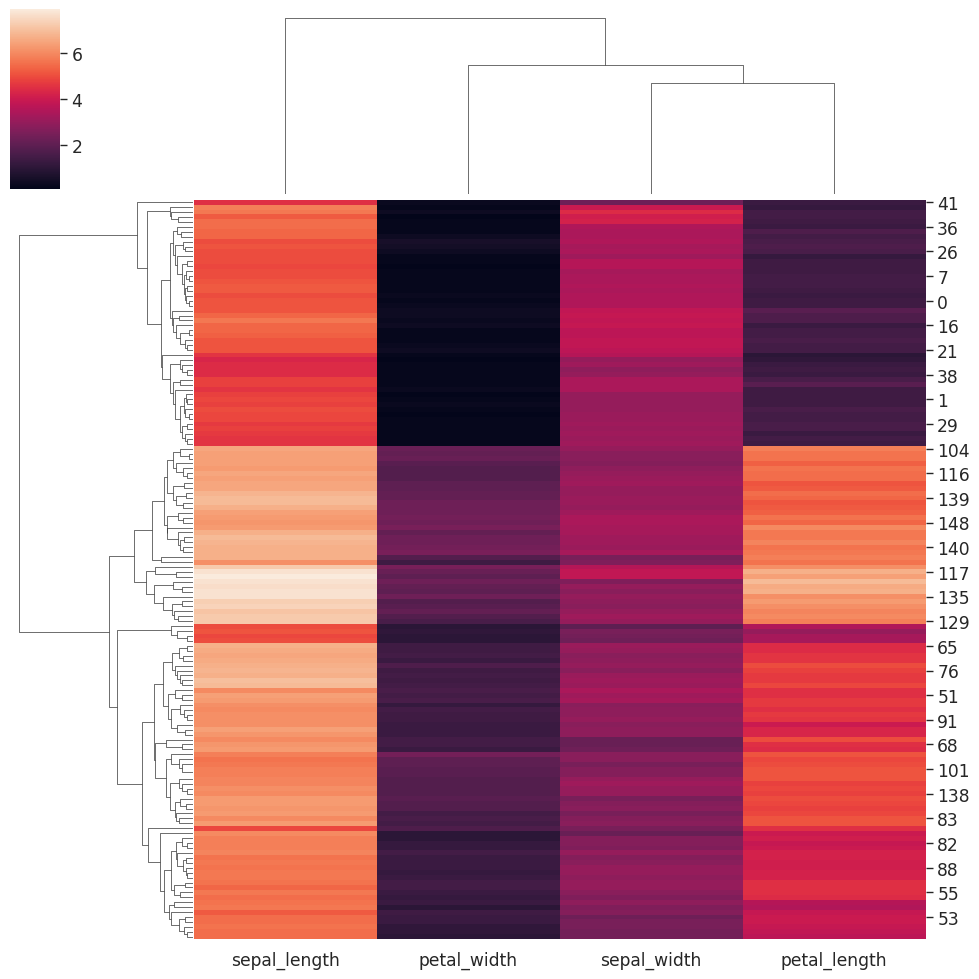

In [25]:
sns.clustermap(df_iris)

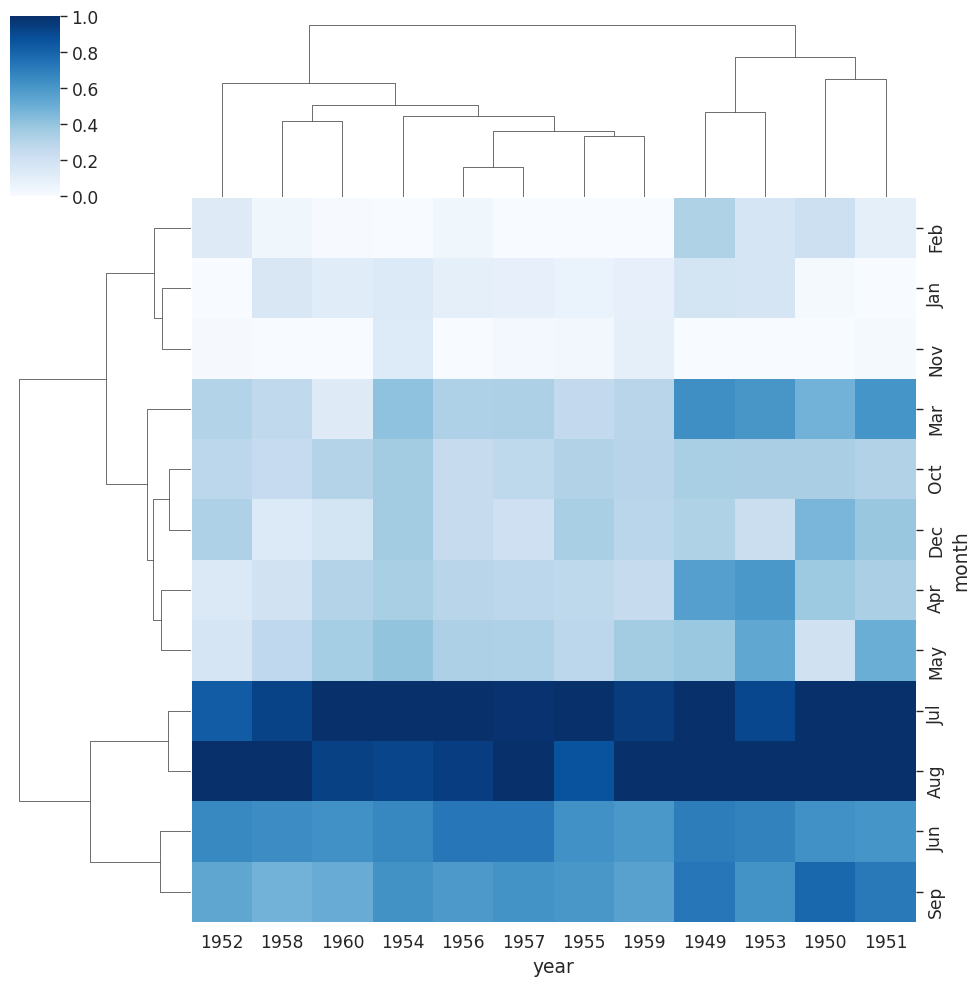

In [26]:
sns.clustermap(pivot_table_flights, cmap='Blues', standard_scale=1)

## PAIRGRID

Trata-se de um gráfico mais avançado, utilizado simplificar a função pairplots quando existem muitos atributos para serem comparados. Nesse caso, podemos criar nosso próprio grid de informações que serão convenientemente personalizadas.

No exemplo abaixo, iremos criar um gráfico que será colorido de acordo com as espécies. Esse pairplot será associado a outra função que irá plotar exibir os dados por meio do método .map(). É conveniente ressaltar que podemos passar várias funções como parâmetros do .map(), porém a mais adequada no momento foi o plt.scatter.

> Observação: o atributo alvo deve estar localizado no mesmo dataset carregado na memória, uma vez que iremos utilizar o parâmetro hue.

* É possível alterar os tipos de gráficos usados nas diagonais ou fazer combinações diferentes de dados nas diagonais e não diagonais. Nesse contexto, é preciso usar os métodos map_diag() e map_offdiag().

* O pairplot traz uma característica que pode ser explorada com propriedade, afinal o triângulo superior possui as mesmas informações do triângulo inferior. Assim, podemos estabelecer funções diferentes em um mesmo gráfico.

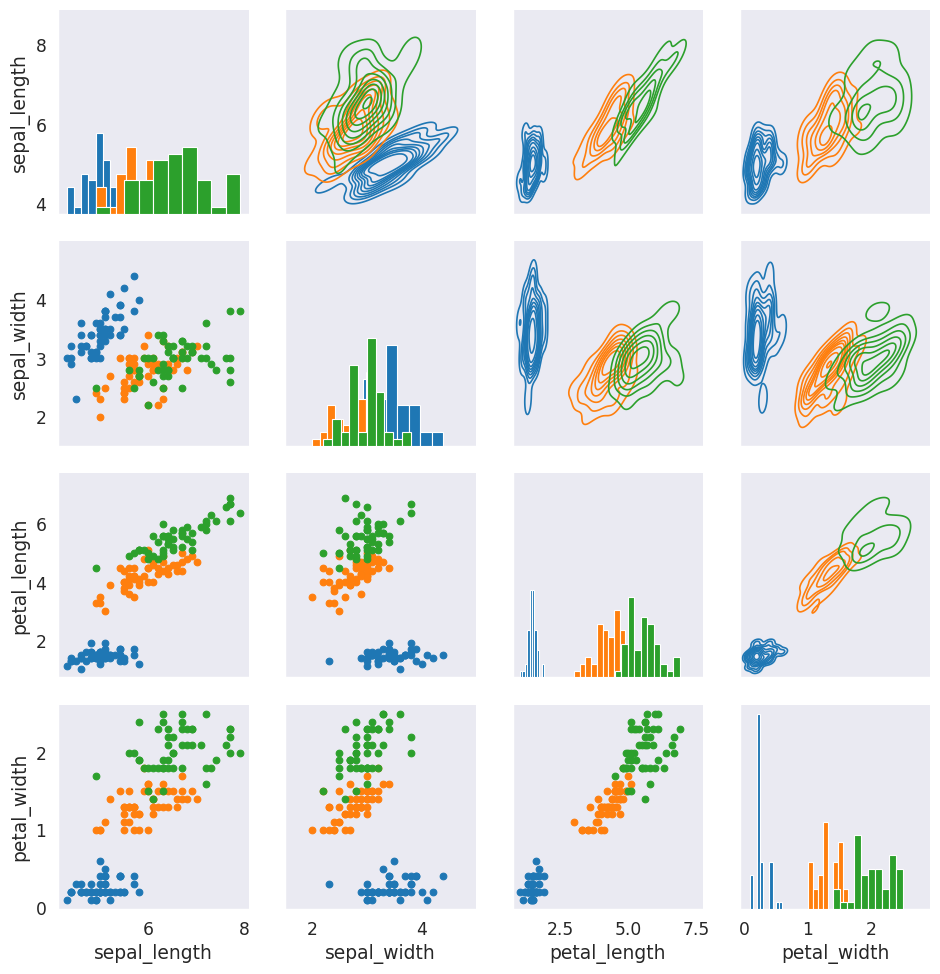

In [27]:
df_iris = sns.load_dataset('iris')
iris_g = sns.PairGrid(df_iris, hue='species')
#iris_g.map(plt.scatter) # essa função não combina com map_diag e map_offdiag
iris_g.map_diag(plt.hist)
#iris_g.map_offdiag(plt.scatter) # essa função não combina com map_upper e map_lower
iris_g.map_lower(plt.scatter)
iris_g.map_upper(sns.kdeplot)

Outro aspecto interessante é a possibilidade de customizar o GRID. Nesse caso, devemos usar os parâmetros x_vars= e y_vars= na função de PairGrid.

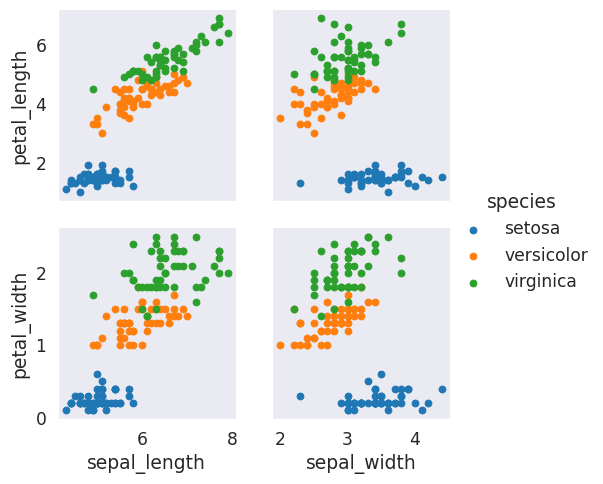

In [28]:
df_iris = sns.load_dataset('iris')
iris_g = sns.PairGrid(df_iris, 
                      hue='species', 
                      x_vars=['sepal_length', 'sepal_width'], 
                      y_vars=['petal_length', 'petal_width'])
iris_g.map(plt.scatter)
iris_g.add_legend()


## FACET GRID

A princípio, não vi uma utilidade para tamanha complexidade. Caso seja necessário, voltarei no assunto posteriormente.

# <center>REGRESSÕES</center>

## REGRESSION PLOT

In [30]:
df_tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Figure size 800x600 with 0 Axes>

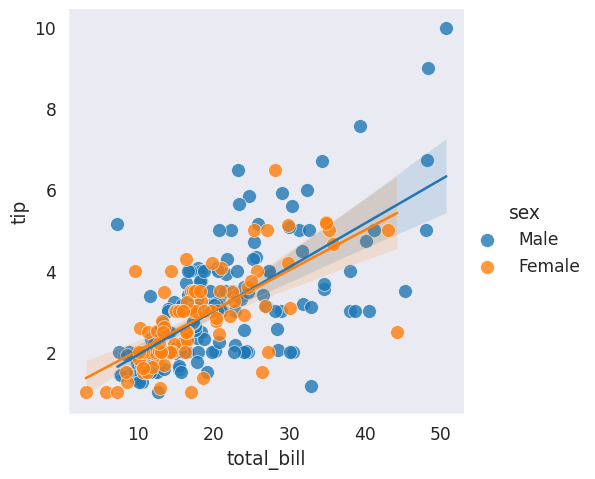

In [32]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)
sns.lmplot(x='total_bill', 
           y='tip', 
           hue='sex', 
           data=df_tips,
           scatter_kws={'s':100, 'linewidth':0.5, 'edgecolor':'white'})

# <center>PALETAS</center>

As paletas são utilizadas para melhorar a aparência dos gráficos. Por isso, é comum utilizarmos as paletas do Matplotlib para estilizar os dados do Seaborn. Convém mencionar que, para verificar as melhores composições de cores, é interessante buscar 'colormaps' no site do Matplotlib. Mas, podemos citar como exemplo: 'magma'.

### Legendas

As legendas podemos ser manipuladas de acordo com configurações de parâmetro inseridas no método sns.legend(). Isso é particularmente relevante quando eles cobrem parte dos dados. Nesse caso, a localização delas pode ser alterada por meio do parâmetro loc=, que recebe como valores 0 (retira a descrição do atributo dentro da legenda), 1 (posiciona direita superior), 2 (posiciona esquerda superior), 3 (posiciona esquerda inferior) e 4 (posiciona direita inferior). No entanto, o método mais efetivo é indireto e consiste em usar plt.figure() para alterar o tamanho da figura do gráfico para que a legenda seja completamente inserida sem ficar superposta aos dados. Por exemplo, o parâmetro 

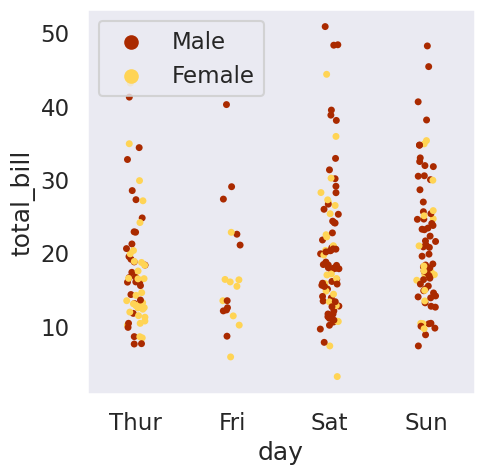

In [29]:
plt.figure(figsize=(5,5))
sns.set_style('dark')
sns.set_context('talk')
sns.stripplot(x='day', y='total_bill', data=df_tips, hue='sex', palette='afmhot')
plt.legend(loc=0)